In [1]:
#Python Implementation of the Hartree Fock Method
#Procedures listed in the code follow as described in Modern Quantum Chemistry: Introduction to Advanced Electronic Structure Theory, By Attila Szabo and Neil S. Ostlund

import math
import numpy as np
from molecule import atom
from molecule import vector
from molecule import guassian
from molecule import molecule
from notebookImporter import importNotebook

#import integrals notebook for the hartree method
integrals = importNotebook("hartree_integrals")

#Step 1
#Specify Molecules, Nuclear Coordinates, and Charge of the nucli Number of Electrons,

#generate an h2 atom with a distance of 1.4 AU to compare with Szabo pg. 175
h2 = molecule()
h2.addAtom(atom(vector(9,9,10.4362), 2, 1))
h2.addAtom(atom(vector(9,9,9), 1, 1))
#h2.addAtom(atom(vector(5,0,0),1,1))
h2.addBasis("STO-3G")
#and a basis set, for now will add default basis of STO-3G for hydrogen to all atoms


[[0.99999999 0.46399664]
 [0.46399664 0.99999999]]

[[2.12808925 0.17824087]
 [0.17824087 0.76003188]]

[[-4.10503468 -1.13453885]
 [-1.13453885 -1.28312439]]
[[-0.68900078 -0.42851218]
 [-0.42851218 -1.22661372]]
Hamiltonian
[[-2.6659462  -1.38481015]
 [-1.38481015 -1.74970623]]

1.2961636355703283
0.6125284537887319
0.32307524552328676
0.18766012834999313


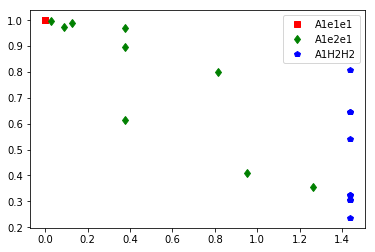

In [2]:
#Step 2
#Calculate Integrals
#Overlap, KE, Nuclear Attraaction, and electron repulsion
S = integrals.overlap(h2)
print(np.matrix(S))

T = integrals.kineticEnergy(h2)
print()
print(np.matrix(T))

V = integrals.nuclearAttraction(h2)
print()

electronRepulsion = integrals.electronElectronRepulsion(h2)

#convert lists into numpy matrices in order to more easily form the electronic hamiltonian
H = np.matrix(T)

#add in all of the nuclear attractions matricies to the hamiltonian
for atomElectronAttraction in V:
    H += np.matrix(atomElectronAttraction)
    print(np.matrix(atomElectronAttraction))
        
print("Hamiltonian")
print(H)
print()

print(electronRepulsion[0][0][0][0])
print(electronRepulsion[0][0][1][1])
print(electronRepulsion[1][0][1][1])
print(electronRepulsion[1][0][1][0])

In [3]:
#Step 3
#Dignolize Overlap Matrix and obtain transformation matrix X

In [4]:
#Step 4
#Obtain guess Density matrix, P

In [5]:
#Step 5 
#Calculate Contraction of Density Matrix with Electron Repulsion, G Matrix

In [6]:
#Step 6
#Calculate Fock matrix, core matrix + G matrix

In [7]:
#Step 7
#Using X diagnolize Fock Matrix

In [8]:
#Step 8
#Diagnolize F' to get C' and E'

In [9]:
#Step 9
#Calculate C from C'

In [10]:
#Step 10
#From P for next iteration of HF Procedure

In [11]:
#Step 11
#Determine if current P is close "enough" to previos P, 
#	if no iterate again start from step 5
#	if yes, then stop iterating, HF procedure completed, and use final C matrix to compute physical properties
